# WorkFlow
## Load the data
## Clean the data
## Visualize the data
## Modelling

## Load the data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./data.csv')

In [3]:
data = data.drop('Country_Region',axis=1)

In [4]:
from tqdm import tqdm
for _ in tqdm(range(25)):
    data = data.sample(frac=1)

100%|██████████| 25/25 [00:03<00:00,  6.27it/s]


In [5]:
len(data)

1058552

## Clean the data

In [6]:
data.head()

,ObservationDate,Province_State,Confirmed,Deaths,Recovered,Active
341244,2020-06-30,South Dakota,342,2.0,0.0,340.0
766236,2020-10-19,Iowa,281,4.0,0.0,277.0
306687,2020-06-20,Mari El Republic,2642,20.0,2543.0,79.0
538215,2020-08-19,Ohio,565,6.0,0.0,559.0
580216,2020-08-31,Illinois,114,1.0,0.0,113.0


In [7]:
data.columns

Index(['ObservationDate', 'Province_State', 'Confirmed', 'Deaths', 'Recovered',
       'Active'],
      dtype='object')

In [8]:
data = data.drop(['Province_State','Confirmed','Deaths','Recovered'],axis=1)

In [9]:
data.head()

,ObservationDate,Active
341244,2020-06-30,340.0
766236,2020-10-19,277.0
306687,2020-06-20,79.0
538215,2020-08-19,559.0
580216,2020-08-31,113.0


In [10]:
from tqdm import tqdm

In [11]:
import re

In [12]:
dates = []
for date in tqdm(data['ObservationDate']):
    dates.append(re.sub('-','',str(date)))

100%|██████████| 1058552/1058552 [00:01<00:00, 767345.53it/s]


In [13]:
data['ObservationDate'] = dates
data = data.rename({'ObservationDate':'Date','Country_Region':'Country'},axis=1)

In [14]:
data

,Date,Active
341244,20200630,340.0
766236,20201019,277.0
306687,20200620,79.0
538215,20200819,559.0
580216,20200831,113.0
...,...,...
996611,20201216,1691.0
253210,20200606,82.0
485253,20200806,1083.0
115400,20200426,42.0


In [15]:
data.dropna(inplace=True)

In [16]:
data.isna().sum()

Date      0
Active    0
dtype: int64

In [17]:
from sklearn.model_selection import *
from sklearn.metrics import *

In [18]:
import numpy as np

In [19]:
data['Date'] = data['Date'].astype(int)
data['Active'] = data['Active']

In [20]:
data.head()

,Date,Active
341244,20200630,340.0
766236,20201019,277.0
306687,20200620,79.0
538215,20200819,559.0
580216,20200831,113.0


In [21]:
data.dtypes

Date        int64
Active    float64
dtype: object

In [22]:
X = data.drop('Active',axis=1)
y = data['Active']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05)

In [24]:
len(X_train),len(X_test)

(1005164, 52904)

## Modelling

In [25]:
import matplotlib.pyplot as plt

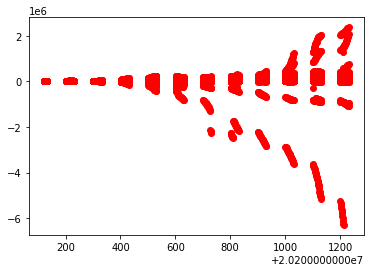

In [26]:
plt.plot(X_train, y_train, 'ro')
plt.show()

In [27]:
import torch
import torch.nn as nn

In [28]:
class Model(nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.input = nn.Linear(input_size,32)
        self.fc1 = nn.Linear(32,64)
        self.relu = nn.ReLU()
        self.output = nn.Linear(64,output_size)
    
    def forward(self,X,relu_q=False):
        y_preds = self.input(X)
        if relu_q:
            y_preds = self.fc1(y_preds)
            y_preds = self.output(y_preds)
            y_preds = self.relu(y_preds)
            return y_preds
        y_preds = self.fc1(y_preds)
        y_preds = self.output(y_preds)
        return y_preds

In [29]:
model = Model(1,1)

In [30]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [31]:
criterion = nn.MSELoss()

In [32]:
X_train = torch.from_numpy(np.array(X_train).astype(np.float32))
X_test = torch.from_numpy(np.array(X_test).astype(np.float32))
y_train = torch.from_numpy(np.array(y_train).astype(np.float32))
y_test = torch.from_numpy(np.array(y_test).astype(np.float32))

In [33]:
import wandb

In [34]:
PROJECT_NAME = "Covid19-Active-Cases"

In [35]:
from tqdm import tqdm

In [36]:
# wandb.init(project=PROJECT_NAME,name='baseline-1')
# for _ in tqdm(range(1)):
#     outputs = model(X_test,True)
#     loss = criterion(outputs,y_test)
#     loss.backward()
#     optimizer.step()
#     optimizer.zero_grad()
#     preds = model(X_test).detach()
#     loss_test = criterion(preds,y_test)
#     wandb.log({'loss':loss.item(),'val_loss':loss_test.item(),'epoch':_})

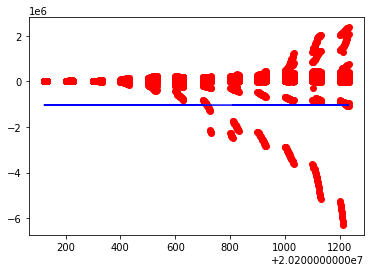

In [37]:
# Plot
predicted = model(X_train).detach().numpy()

plt.plot(np.array(X_train), np.array(y_train), 'ro')
plt.plot(np.array(X_train), predicted, 'b')
plt.show()

In [38]:
# best num of epochs
# best activation
# best optimizer
# best loss
## best lr
## best num of layers

In [39]:
class Model(nn.Module):
    def __init__(self,input_size,output_size,activation_funtion):
        super().__init__()
        self.input = nn.Linear(input_size,32)
        self.fc1 = nn.Linear(32,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,32)
        self.af = activation_funtion()
        self.output = nn.Linear(32,output_size)
    
    def forward(self,X,af=False,num_of_layers=2):
        y_preds = self.input(X)
        if af:
            y_preds = self.fc1(y_preds)
            for _ in range(num_of_layers):
                y_preds = self.fc2(y_preds)
            y_preds = self.fc3(y_preds)
            y_preds = self.output(y_preds)
            y_preds = self.af(y_preds)
            return y_preds
        y_preds = self.fc1(y_preds)
        for _ in range(num_of_layers):
            y_preds = self.fc2(y_preds)
        y_preds = self.fc3(y_preds)
        y_preds = self.output(y_preds)
        return y_preds
model = Model(1,1,nn.ReLU)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
criterion = nn.MSELoss()

In [40]:
# # best num_of_epochs
# epochs_to_try = [25,50,75,100,125,250,500]
# for epoch_to_try in epochs_to_try:
#     model = Model(1,1,nn.ReLU)
#     optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
#     criterion = nn.MSELoss()
#     wandb.init(project=PROJECT_NAME,name=f'epoch_to_try-{epoch_to_try}')
#     for _ in tqdm(range(epoch_to_try)):
#         outputs = model(X_test,True)
#         loss = criterion(outputs,y_test)
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#         preds = model(X_test).detach()
#         loss_test = criterion(preds,y_test)
#         wandb.log({'loss':loss.item(),'val_loss':loss_test.item(),'epoch':_})
#     wandb.finish()

In [41]:
# # best activation
# activations = [nn.ELU,nn.LeakyReLU,nn.PReLU,nn.ReLU,nn.ReLU6,nn.RReLU,nn.SELU,nn.CELU,nn.GELU,nn.SiLU,nn.Tanh]
# for activation in activations:
#     model = Model(1,1,activation)
#     optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
#     criterion = nn.MSELoss()
#     wandb.init(project=PROJECT_NAME,name=f'activation-{activation}')
#     for _ in tqdm(range(100)):
#         outputs = model(X_test,True)
#         loss = criterion(outputs,y_test)
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#         preds = model(X_test).detach()
#         loss_test = criterion(preds,y_test)
#         wandb.log({'loss':loss.item(),'val_loss':loss_test.item(),'epoch':_})
#     wandb.finish()

In [42]:
# # best optimizer
# optimizers = [torch.optim.Adam,torch.optim.AdamW,torch.optim.Adamax,torch.optim.SGD]
# for optimizer in optimizers:
#     model = Model(1,1,nn.ReLU)
#     optimizer = optimizer(model.parameters(),lr=0.01)
#     criterion = nn.MSELoss()
#     wandb.init(project=PROJECT_NAME,name=f'optimizer-{optimizer}')
#     for _ in tqdm(range(100)):
#         outputs = model(X_test,True)
#         loss = criterion(outputs,y_test)
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#         preds = model(X_test).detach()
#         loss_test = criterion(preds,y_test)
#         wandb.log({'loss':loss.item(),'val_loss':loss_test.item(),'epoch':_})
#     wandb.finish()

In [43]:
# # best loss
# lossess = [nn.L1Loss,nn.MSELoss,torch.nn.HingeEmbeddingLoss,torch.nn.MarginRankingLoss,torch.nn.TripletMarginLoss]
# for loss_ in lossess:
#     model = Model(1,1,nn.ReLU)
#     optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
#     criterion = loss_()
#     wandb.init(project=PROJECT_NAME,name=f'loss_-{loss_}')
#     for _ in tqdm(range(100)):
#         outputs = model(X_test,True)
#         loss = criterion(outputs,y_test)
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#         preds = model(X_test).detach()
#         loss_test = criterion(preds,y_test)
#         wandb.log({'loss':loss.item(),'val_loss':loss_test.item(),'epoch':_})
#     wandb.finish()

In [44]:
# # best num of layers
# num_of_layers = [1,2,3,4,5,7,10,12,25,50,75,100]
# for num_of_layers in num_of_layers:
#     model = Model(1,1,nn.ReLU)
#     optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
#     criterion = nn.MSELoss()
#     wandb.init(project=PROJECT_NAME,name=f'num_of_layers-{num_of_layers}')
#     for _ in tqdm(range(10)):
#         outputs = model(X_test,True,num_of_layers)
#         loss = criterion(outputs,y_test)
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#         preds = model(X_test,True,num_of_layers).detach()
#         loss_test = criterion(preds,y_test)
#         wandb.log({'loss':loss.item(),'val_loss':loss_test.item(),'epoch':_})
#     wandb.finish()

In [45]:
# best num of epochs = 125
# best activation = RReLU
# best optimizer = Adam
# best loss = L1Loss
## best lr = 
## best num of layers = 9

In [46]:
# # best num of layers
# lrs = [1.0,0.1,0.01,0.001,0.0001,0.00001]
# for lr in lrs:
#     model = Model(1,1,nn.ReLU)
#     optimizer = torch.optim.Adam(model.parameters(),lr=lr)
#     criterion = nn.MSELoss()
#     wandb.init(project=PROJECT_NAME,name=f'lr-{lr}')
#     for _ in tqdm(range(10)):
#         outputs = model(X_test,True,2)
#         loss = criterion(outputs,y_test)
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#         preds = model(X_test,True,2).detach()
#         loss_test = criterion(preds,y_test)
#         wandb.log({'loss':loss.item(),'val_loss':loss_test.item(),'epoch':_})
#     wandb.finish()

In [47]:
# best num of epochs = 125
# best activation = RReLU
# best optimizer = Adam
# best loss = L1Loss
## best lr = 0.1
## best num of layers = 9

In [52]:
lr = 0.1
model = Model(1,1,nn.RReLU)
epochs = 1
optimizer = torch.optim.Adam(model.parameters(),lr=lr)
criterion = nn.L1Loss()

In [ ]:
wandb.init(project=PROJECT_NAME,name='Big-Dog-Model-0')
for epoch in tqdm(range(epochs)):
    outputs = model(X_test,True,9)
    loss = criterion(outputs,y_test)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    outputs = model(X_test,True,2).detach()
    loss_test = criterion(outputs,y_test)
    wandb.log({'loss':loss.item(),'val_loss':loss_test.item(),'epoch':epoch})
wandb.finish()

In [ ]:
# Plot
predicted = model(X_train).detach().numpy()

plt.plot(np.array(X_train), np.array(y_train), 'ro')
plt.plot(np.array(X_train), predicted, 'b')
plt.show()

In [ ]:
torch.save('./model.pth',model)

In [ ]:
torch.save('./model.pt',model)

## Done